In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.colors as pc

In [2]:
shared_color=pc.sequential.Inferno

In [4]:
RCB=pd.read_csv('../iplanalytics/data/squad/Royal_Challengers_Bengaluru.csv')
RCB

,Unnamed: 0,id,name,role,battingStyle,bowlingStyle,country,playerImg
0,0,1989ac7c-a6cb-4171-bc83-16a2323d2fe8,Manoj Bhandage,Batting Allrounder,Left Handed Bat,Right-arm fast-medium,India,https://h.cricapi.com/img/icon512.png
1,1,3f3ecf51-8411-4046-9477-18c0fe3da6ac,Bhuvneshwar Kumar,Bowler,Right Handed Bat,Right-arm fast-medium,India,https://h.cricapi.com/img/players/3f3ecf51-841...
2,2,c61d247d-7f77-452c-b495-2813a9cd0ac4,Virat Kohli,Batsman,Right Handed Bat,Right-arm medium,India,https://h.cricapi.com/img/players/c61d247d-7f7...
3,3,f061b5fc-cd70-480c-86aa-45c7828e739c,Yash Dayal,Bowler,Right Handed Bat,Left-arm fast-medium,India,https://h.cricapi.com/img/icon512.png
4,4,7fd4fa20-bc49-4337-ae8a-540b67cb011d,Romario Shepherd,Bowling Allrounder,Right Handed Bat,Right-arm fast-medium,West Indies,https://h.cricapi.com/img/players/7fd4fa20-bc4...
5,5,d8b0e01b-b754-432b-80a4-551e8c7ec8ca,Jacob Bethell,Batting Allrounder,Left Handed Bat,Left-arm orthodox,England,https://h.cricapi.com/img/icon512.png
6,6,2d5be1e6-f1c6-4762-812a-55458b929013,Mohit Rathee,Bowling Allrounder,Right Handed Bat,Right-arm legbreak,India,https://h.cricapi.com/img/icon512.png
7,7,88215ee9-ca67-48af-a3f0-6b38718bd830,Rajat Patidar,Batsman,Right Handed Bat,Right-arm offbreak,India,https://h.cricapi.com/img/icon512.png
8,8,69718248-2a3a-45d4-9a2a-6f4dfc6942a5,Tim David,Batsman,Right Handed Bat,Right-arm offbreak,Australia,https://h.cricapi.com/img/players/69718248-2a3...
9,9,a1782393-3479-4caa-9c27-79cb87df9abc,Lungi Ngidi,Bowler,Right Handed Bat,Right-arm fast,South Africa,https://h.cricapi.com/img/players/a1782393-347...


In [5]:
RCB.role

0     Batting Allrounder
1                 Bowler
2                Batsman
3                 Bowler
4     Bowling Allrounder
5     Batting Allrounder
6     Bowling Allrounder
7                Batsman
8                Batsman
9                 Bowler
10                Bowler
11                Bowler
12    Bowling Allrounder
13                Bowler
14               Batsman
15            WK-Batsman
16               Batsman
17    Batting Allrounder
18            WK-Batsman
19                Bowler
20    Batting Allrounder
21                Bowler
Name: role, dtype: object

In [6]:
RCB['style'] = np.select(
    [
        RCB.role.str.lower() == 'bowler',
        RCB.role.str.lower() == 'batsman',
        RCB.role.str.lower() == 'batting allrounder',
        RCB.role.str.lower() == 'bowling allrounder',
        RCB.role.str.lower() == 'wk-batsman'
    ],

    [
        RCB.bowlingStyle,
        RCB.battingStyle,
        RCB.battingStyle,
        RCB.bowlingStyle,
        RCB.battingStyle
    ],

    default=np.nan
)

In [7]:
RCB.head()

,Unnamed: 0,id,name,role,battingStyle,bowlingStyle,country,playerImg,style
0,0,1989ac7c-a6cb-4171-bc83-16a2323d2fe8,Manoj Bhandage,Batting Allrounder,Left Handed Bat,Right-arm fast-medium,India,https://h.cricapi.com/img/icon512.png,Left Handed Bat
1,1,3f3ecf51-8411-4046-9477-18c0fe3da6ac,Bhuvneshwar Kumar,Bowler,Right Handed Bat,Right-arm fast-medium,India,https://h.cricapi.com/img/players/3f3ecf51-841...,Right-arm fast-medium
2,2,c61d247d-7f77-452c-b495-2813a9cd0ac4,Virat Kohli,Batsman,Right Handed Bat,Right-arm medium,India,https://h.cricapi.com/img/players/c61d247d-7f7...,Right Handed Bat
3,3,f061b5fc-cd70-480c-86aa-45c7828e739c,Yash Dayal,Bowler,Right Handed Bat,Left-arm fast-medium,India,https://h.cricapi.com/img/icon512.png,Left-arm fast-medium
4,4,7fd4fa20-bc49-4337-ae8a-540b67cb011d,Romario Shepherd,Bowling Allrounder,Right Handed Bat,Right-arm fast-medium,West Indies,https://h.cricapi.com/img/players/7fd4fa20-bc4...,Right-arm fast-medium


In [8]:
import plotly.express as px


fig = px.sunburst(
    RCB,
    path = ['role', 'style', 'name'],
    color_discrete_sequence=shared_color
)

fig.update_layout(
    title_font_size=20,
    width=600,
    height=600,       
    #uniformtext_minsize=12,
    #uniformtext_mode='hide',
)

fig.show()

In [9]:
# import plotly.express as px  # Step 1: Import Plotly Express

# # Step 2: Create the plot
# fig = px.histogram(
#     RCB,               # Your DataFrame
#     x='role',          # Column to plot on the X-axis (roles)
#     color='role',      # Optional: gives each role a different color
#     title='Player Role Distribution in RCB',  # Chart title
#     labels={'role': 'Role'},                 # Custom label for X-axis
#     text_auto=True     # Shows the actual counts on top of the bars
# )

# # Step 3: Customize the layout
# fig.update_layout(
#     xaxis_title='Role',          # Label below X-axis
#     yaxis_title='Number of Players',  # Label on Y-axis
#     template='plotly_white',     # Clean, white background
#     title_font_size=20,          # Title font size
#     xaxis_tickangle=45,          # Rotate x-axis labels by 45 degrees
#     showlegend=False             # Hide legend (not needed here)
# )

# # Step 4: Show the plot
# fig.show()


In [10]:
b=RCB.groupby('name')['country'].max().reset_index().sort_values(by='country')
b

,name,country
19,Tim David,Australia
5,Josh Hazlewood,Australia
3,Jacob Bethell,England
7,Liam Livingstone,England
12,Philip Salt,England
0,Abhinandan Singh,India
18,Swastik Chikara,India
17,Swapnil Singh,India
16,Suyash Sharma,India
14,Rasikh Dar Salam,India


In [11]:
b.name

19            Tim David
5        Josh Hazlewood
3         Jacob Bethell
7      Liam Livingstone
12          Philip Salt
0      Abhinandan Singh
18      Swastik Chikara
17        Swapnil Singh
16        Suyash Sharma
14     Rasikh Dar Salam
13        Rajat Patidar
10         Mohit Rathee
20          Virat Kohli
9        Manoj Bhandage
6         Krunal Pandya
4         Jitesh Sharma
2      Devdutt Padikkal
1     Bhuvneshwar Kumar
21           Yash Dayal
8           Lungi Ngidi
11       Nuwan Thushara
15     Romario Shepherd
Name: name, dtype: object

In [12]:
RCB.columns

Index(['Unnamed: 0', 'id', 'name', 'role', 'battingStyle', 'bowlingStyle',
       'country', 'playerImg', 'style'],
      dtype='object')

In [13]:
RCB.battingStyle

0      Left Handed Bat
1     Right Handed Bat
2     Right Handed Bat
3     Right Handed Bat
4     Right Handed Bat
5      Left Handed Bat
6     Right Handed Bat
7     Right Handed Bat
8     Right Handed Bat
9     Right Handed Bat
10     Left Handed Bat
11    Right Handed Bat
12    Right Handed Bat
13    Right Handed Bat
14     Left Handed Bat
15    Right Handed Bat
16    Right Handed Bat
17     Left Handed Bat
18    Right Handed Bat
19    Right Handed Bat
20    Right Handed Bat
21    Right Handed Bat
Name: battingStyle, dtype: object

In [17]:
df1=pd.read_csv("../iplanalytics/data/match_info-10jun25.csv")

In [18]:
df2=pd.read_csv("../iplanalytics/data/match_list-9jun25.csv")

In [19]:
df = pd.merge(df1, df2, left_on='id', right_on='MatchID', how='inner')

In [20]:
RCB_data=df.loc[(df.Team1=="Royal Challengers Bengaluru") | (df.Team2=="Royal Challengers Bengaluru")]

In [21]:
df['Cities'] = df.MatchVenue.str.split(',', n=1, expand=True)[1]
# df.Cities.unique().tolist()

In [22]:
# df

In [23]:
Venue_score=df.groupby('Cities')[['r1','r2']].mean().max(axis=1).reset_index()
Venue_score
Venue_score = Venue_score.rename(columns={0:'Avg_Runs'})
#plt.figure(figsize=(12,6))
#sb.barplot(x=Venue_score.Cities,y=Venue_score.Avg_Runs,palette='flare')
#plt.xticks(rotation=90)
# #plt.show()
# Venue_score

In [24]:
import plotly.express as px

# Grouping match count by city
y = df.groupby('Cities')[['MatchName']].count().reset_index()

# Rename columns for clarity (optional)
y.columns = ['City', 'Match Count']

# Create horizontal bar chart using Plotly
fig = px.bar(
    y,
    x='City',
    y='Match Count',
    orientation='v',  # Vertical bars
    title='Match distribution across stadium',
    color='Match Count',
    color_continuous_scale='blues',
    text_auto = True
)

# Customize layout
fig.update_layout(
    showlegend = False,
    yaxis_title="Match Count",
    xaxis_title="Stadium (City)",
    height=400,
    width=900,
    plot_bgcolor='rgba(0,0,0,0)',
    
)

fig.update_traces(
    textposition = 'inside'
)

fig.show()


In [27]:
# --- Venue average score (line) ---
RCB_data['Cities'] = RCB_data.MatchVenue.str.split(',', n=1, expand=True)[1]

Venue_score = RCB_data.groupby('Cities')[['r1','r2']].mean().max(axis=1).reset_index()
Venue_score = Venue_score.rename(columns={0: 'Avg_Runs'})

# --- Match count per city (bar) ---
match_count = RCB_data.groupby('Cities')[['MatchName']].count().reset_index()
match_count = match_count.rename(columns={'MatchName': 'Match_Count'})

# --- Merge both on 'Cities' ---
combined = pd.merge(match_count, Venue_score, on='Cities')

fig = go.Figure()

# Bar Chart for Match Count
fig.add_trace(go.Bar(
    x=combined['Cities'],
    y=combined['Match_Count'],
    name='Match Count',
    marker_color='indigo',
    yaxis='y',
    marker=dict(color=shared_color[:len(combined)])
))

# Line Chart for Average Runs
fig.add_trace(go.Scatter(
    x=combined['Cities'],
    y=combined['Avg_Runs'],
    name='Average Runs',
    mode='lines+markers',
    line=dict(color='orange', width=3),
    yaxis='y2',
    marker=dict(color=shared_color[:len(combined)])
))

# Layout with Dual Axes
fig.update_layout(
    title='Match Count and Average Runs by City',
    xaxis=dict(title='City'),
    yaxis=dict(title='Match Count', side='left'),
    yaxis2=dict(title='Average Runs', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.1, orientation='h'),
    template='plotly_white',
    width=1000,
    height=600
)

fig.show()


C:\Users\Mithun Shrawankar\AppData\Local\Temp\ipykernel_656\3924285434.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

overseas_players = RCB[RCB['country'] != 'India'][['name', 'country', 'role']]

overseas_players

,name,country,role
4,Romario Shepherd,West Indies,Bowling Allrounder
5,Jacob Bethell,England,Batting Allrounder
8,Tim David,Australia,Batsman
9,Lungi Ngidi,South Africa,Bowler
10,Josh Hazlewood,Australia,Bowler
18,Philip Salt,England,WK-Batsman
19,Nuwan Thushara,Sri Lanka,Bowler
20,Liam Livingstone,England,Batting Allrounder


In [ ]:
Matches_won=df.loc[(df.matchWinner=="Royal Challengers Bengaluru")]
# Matches_won


In [ ]:
RCB_data=df.loc[(df.Team1=="Royal Challengers Bengaluru") | (df.Team2=="Royal Challengers Bengaluru")]
# RCB_data

In [ ]:
won=Matches_won.groupby('Cities')[['MatchName']].count().reset_index()
won

,Cities,MatchName
0,Ahmedabad,1
1,Bengaluru,2
2,Chennai,1
3,Delhi,1
4,Jaipur,1
5,Kolkata,1
6,Lucknow,1
7,"Mullanpur, Chandigarh",2
8,Mumbai,1


In [ ]:
y=RCB_data.groupby('Cities')[['MatchName']].count().reset_index()
y

,Cities,MatchName
0,Ahmedabad,1
1,Bengaluru,6
2,Chennai,1
3,Delhi,1
4,Jaipur,1
5,Kolkata,1
6,Lucknow,2
7,"Mullanpur, Chandigarh",2
8,Mumbai,1


In [ ]:
combined1 = pd.merge(won, y, on='Cities', how='outer')
combined1

,Cities,MatchName_x,MatchName_y
0,Ahmedabad,1,1
1,Bengaluru,2,6
2,Chennai,1,1
3,Delhi,1,1
4,Jaipur,1,1
5,Kolkata,1,1
6,Lucknow,1,2
7,"Mullanpur, Chandigarh",2,2
8,Mumbai,1,1


In [ ]:
combined1 = combined1.rename(columns={'MatchName_x': 'Won','MatchName_y': 'Played'})
combined1

,Cities,Won,Played
0,Ahmedabad,1,1
1,Bengaluru,2,6
2,Chennai,1,1
3,Delhi,1,1
4,Jaipur,1,1
5,Kolkata,1,1
6,Lucknow,1,2
7,"Mullanpur, Chandigarh",2,2
8,Mumbai,1,1


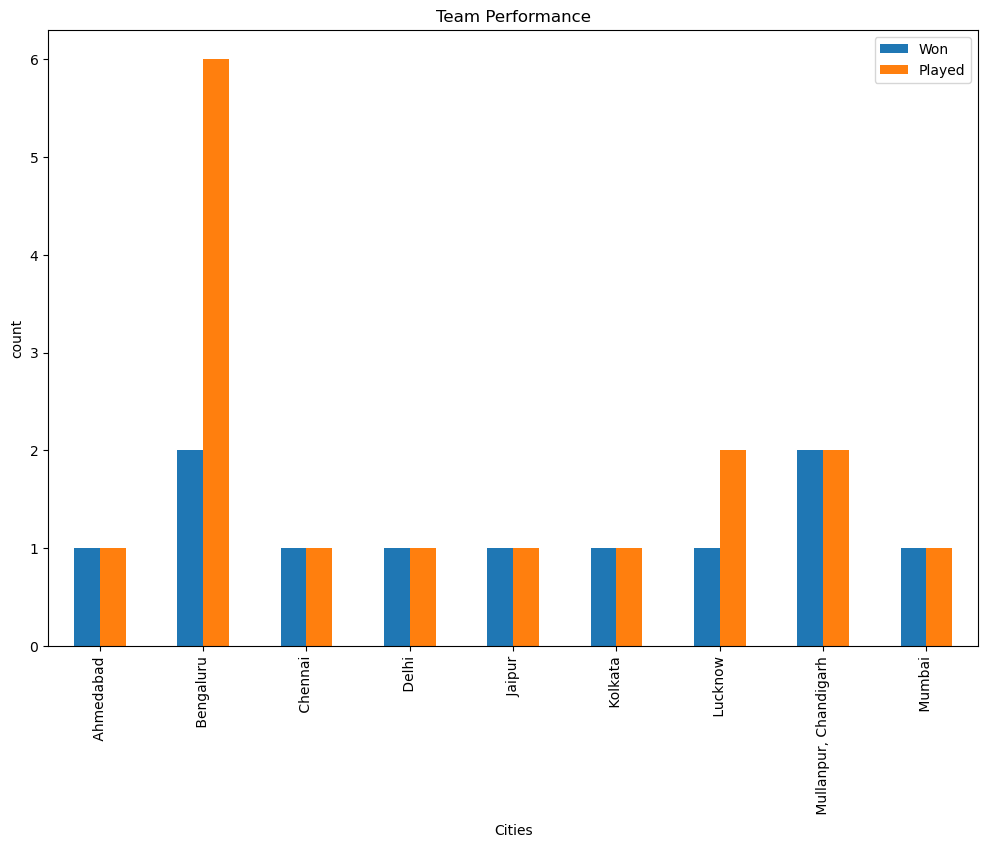

In [ ]:
combined1.plot(kind="bar",x='Cities', figsize=(12,8), ylabel='count',title ='Team Performance' )
plt.show()

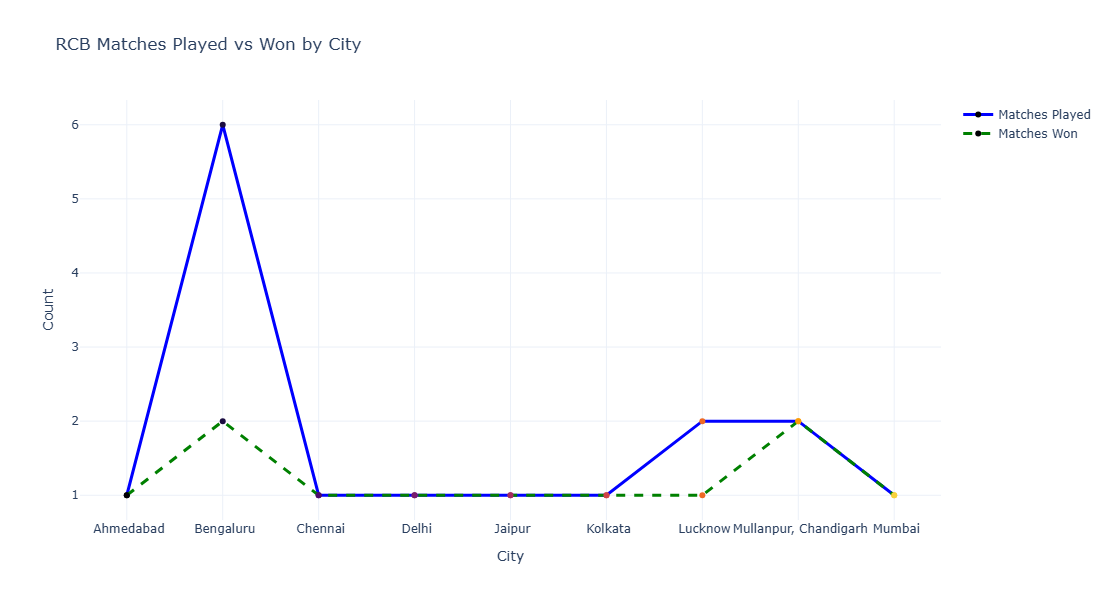

In [ ]:
# Replace NaN with 0 for plotting
combined1['Won'] = combined1['Won'].fillna(0)

# Create the plot
fig = go.Figure()

# Line for Matches Played
fig.add_trace(go.Scatter(
    x=combined1['Cities'],
    y=combined1['Played'],
    mode='lines+markers',
    name='Matches Played',
    line=dict(color='blue', width=3),
    marker=dict(color=shared_color[:len(combined)])
))

# Line for Matches Won
fig.add_trace(go.Scatter(
    x=combined1['Cities'],
    y=combined1['Won'],
    mode='lines+markers',
    name='Matches Won',
    line=dict(color='green', width=3, dash='dash'),
    marker=dict(color=shared_color[:len(combined)])
))

# Update layout
fig.update_layout(
    title='RCB Matches Played vs Won by City',
    xaxis_title='City',
    yaxis_title='Count',
    template='plotly_white',
    width=1000,
    height=600
)

fig.show()


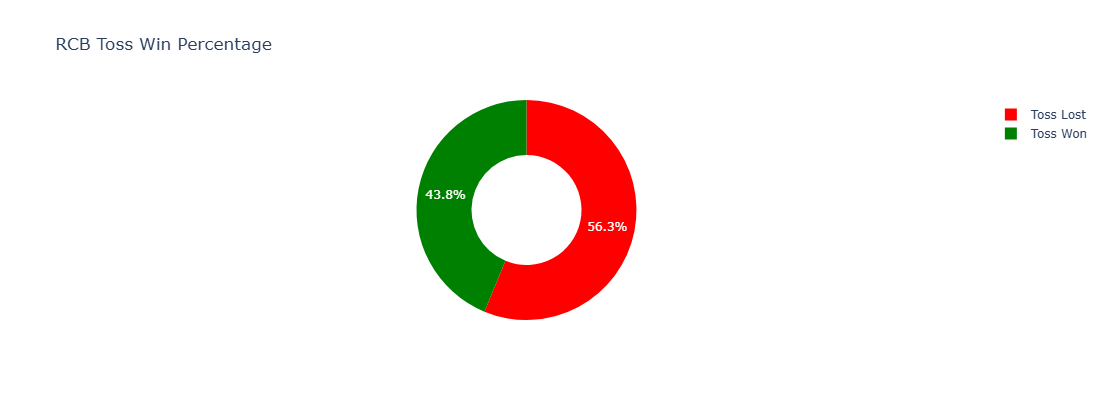

In [ ]:
rcb_tosses = RCB_data[(RCB_data['Team1'] == 'Royal Challengers Bengaluru') | (RCB_data['Team2'] == 'Royal Challengers Bengaluru')]

# Tosses won by RCB
rcb_toss_wins = rcb_tosses[rcb_tosses['tossWinner'] == 'Royal Challengers Bengaluru']

# Percentage calculation
total = len(rcb_tosses)
wins = len(rcb_toss_wins)
losses = total - wins

# Pie Chart for Toss Win %
fig = go.Figure(data=[go.Pie(
    labels=['Toss Won', 'Toss Lost'],
    values=[wins, losses],
    hole=0.5,
    marker=dict(colors=['green', 'red'])
)])
fig.update_layout(
    title="RCB Toss Win Percentage",
    height=400,
    width=500
)
fig.show()


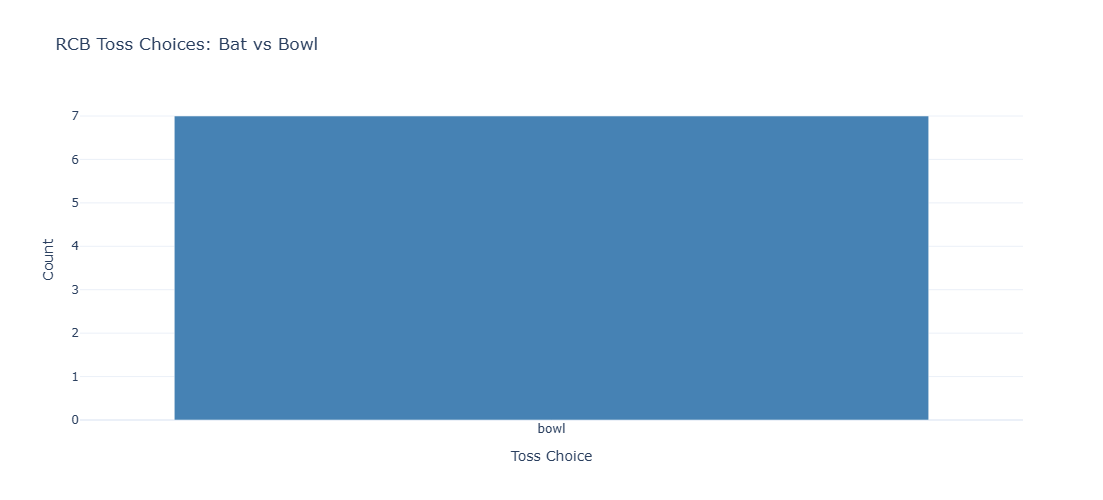

In [ ]:
rcb_toss_wins = rcb_tosses[rcb_tosses['tossWinner'] == 'Royal Challengers Bengaluru']

# Count toss choices
choice_counts = rcb_toss_wins['tossChoice'].value_counts().reset_index()
choice_counts.columns = ['Toss Choice', 'Count']


fig = go.Figure(data=[
    go.Bar(name='RCB', x=choice_counts['Toss Choice'], y=choice_counts['Count'], marker_color='steelblue')
])

fig.update_layout(
    title='RCB Toss Choices: Bat vs Bowl',
    xaxis_title='Toss Choice',
    yaxis_title='Count',
    barmode='group',
    height=500,
    width=600,
    template='plotly_white'
)
fig.show()


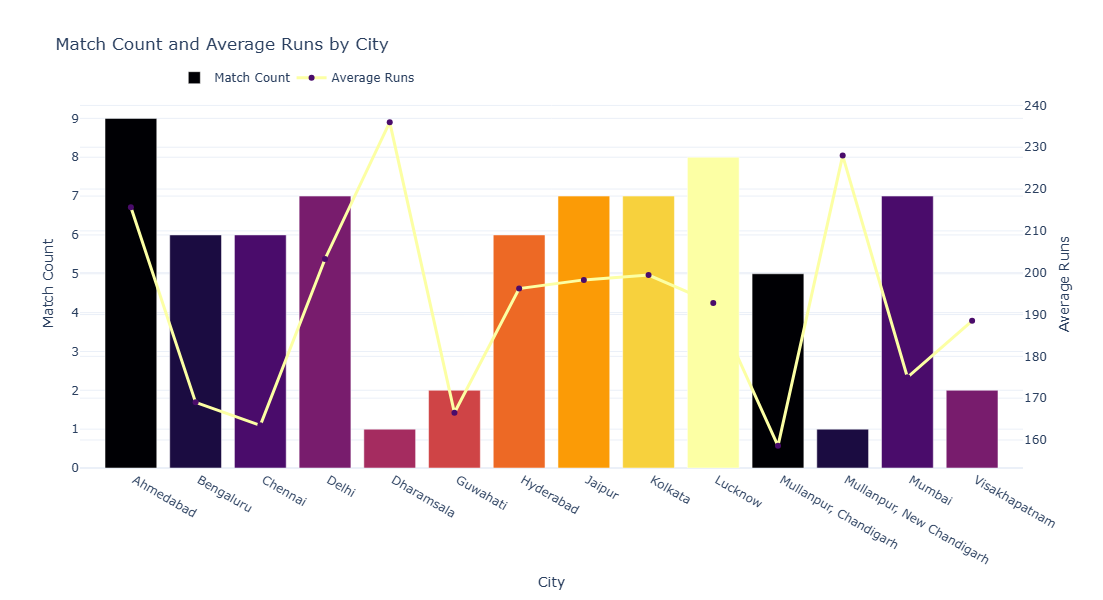

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Sample data creation (replace this with your actual `df`)
# df = your existing DataFrame with Cities, r1, r2, MatchName columns

# --- Venue average score (line) ---
Venue_score = df.groupby('Cities')[['r1', 'r2']].mean().max(axis=1).reset_index()
Venue_score = Venue_score.rename(columns={0: 'Avg_Runs'})

# --- Match count per city (bar) ---
match_count = df.groupby('Cities')[['MatchName']].count().reset_index()
match_count = match_count.rename(columns={'MatchName': 'Match_Count'})

# --- Merge both on 'Cities' ---
combined = pd.merge(match_count, Venue_score, on='Cities')

# Inferno color scale
colors = px.colors.sequential.Inferno
color_list = colors * (len(combined) // len(colors) + 1)  # ensure enough colors

fig = go.Figure()

# Bar Chart for Match Count with Inferno colors
fig.add_trace(go.Bar(
    x=combined['Cities'],
    y=combined['Match_Count'],
    name='Match Count',
    marker_color=color_list[:len(combined)],
    yaxis='y'
))

# Line Chart for Average Runs with Inferno color for consistency
fig.add_trace(go.Scatter(
    x=combined['Cities'],
    y=combined['Avg_Runs'],
    name='Average Runs',
    mode='lines+markers',
    line=dict(color=colors[-1], width=3),  # darkest color for line
    marker=dict(color=colors[2]),
    yaxis='y2'
))

# Layout with dual y-axes
fig.update_layout(
    title='Match Count and Average Runs by City',
    xaxis=dict(title='City'),
    yaxis=dict(title='Match Count', side='left'),
    yaxis2=dict(title='Average Runs', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.1, orientation='h'),
    template='plotly_white',
    width=1000,
    height=600
)

fig.show()


# 